In [2]:
%load_ext autoreload

%autoreload 2

from tqdm.notebook import trange, tqdm
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
import cProfile

from model import model
from model import variables
from model import snr_to_ber

In [19]:
cProfile.run('model.run_model(velocity=20, q_bit=0, tid_is_on=False, tari=6.25, num_of_sym_per_bit=1, trext=0)')

         13901938 function calls (9567151 primitive calls) in 44.170 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(any)
   180000    0.674    0.000    1.627    0.000 <__array_function__ internals>:2(dot)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(linspace)
      101    0.000    0.000    0.010    0.000 <__array_function__ internals>:2(mean)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(ndim)
    40000    0.153    0.000    1.555    0.000 <__array_function__ internals>:2(norm)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(result_type)
        1    0.002    0.002   47.793   47.793 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:1(__new__)
    40003    0.094    0.000    0.205    0.000 _asarray.py:14(asarray)
      106    

In [3]:
res_tari_625_m_1_tid_off = [model.run_model(velocity=v, q_bit=0, tid_is_on=False,
              tari=6.25, num_of_sym_per_bit=1, trext=0) for v in tqdm(range(13, 50, 2))]

  0%|          | 0/19 [00:00<?, ?it/s]

In [14]:
model.run_model(velocity=45, q_bit=0, tid_is_on=False,
              tari=6.25, num_of_sym_per_bit=1, trext=0)

11.9921953125 0.3532437646361615 11.992406990699068
11.96830541015625 0.34972866975377115 11.969004830483048
11.9444155078125 0.34619149960249695 11.945602670267025
11.92052560546875 0.3424359737536058 11.920900390039003
11.896635703125 0.33885940145075916 11.89749822982298
11.87274580078125 0.33506652008506077 11.872795949594959
11.8488558984375 0.3314585578989759 11.849393789378937
11.82496599609375 0.32783819997735614 11.825991629162916
11.80107609375 0.324005322862184 11.801289348934892
11.77718619140625 0.3203653208431325 11.777887188718871
11.7532962890625 0.31671856412295596 11.754485028502849
11.72940638671875 0.3128638759881361 11.729782748274827
11.705516484375 0.30920887628186217 11.706380588058805
11.68162658203125 0.3053494252796123 11.681678307830783
11.6577366796875 0.3016935838763126 11.65827614761476
11.63384677734375 0.2980399319892805 11.63487398739874
11.609956875 0.2941875051492632 11.610171707170716
11.58606697265625 0.2905435188219807 11.586769546954695
11.562177

KeyboardInterrupt: 

In [4]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.8546666666666667, num_cars=1.0, num_rounds=1648.2229999999997, round_duration=0.0005217088881590349),
 ProbRet(velocity=15, probability=0.8173333333333334, num_cars=1.0, num_rounds=1428.5819999999997, round_duration=0.0004697098949301303),
 ProbRet(velocity=17, probability=0.7743333333333333, num_cars=1.0, num_rounds=1260.5086666666664, round_duration=0.0004362397100273646),
 ProbRet(velocity=19, probability=0.7469999999999999, num_cars=1.0, num_rounds=1127.8239999999998, round_duration=0.00041288326348392853),
 ProbRet(velocity=21, probability=0.696, num_cars=1.0, num_rounds=1020.3829999999998, round_duration=0.0003956661574910459),
 ProbRet(velocity=23, probability=0.677666666666667, num_cars=1.0, num_rounds=931.7170000000002, round_duration=0.0003824182999296214),
 ProbRet(velocity=25, probability=0.635, num_cars=1.0, num_rounds=857.1433333333334, round_duration=0.0003719406297728263),
 ProbRet(velocity=27, probability=0.6053333333333333, num_cars

In [5]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.8866666666666666, num_cars=1.0, num_rounds=1648.58, round_duration=0.0005323526762524004),
 ProbRet(velocity=15, probability=0.8133333333333335, num_cars=1.0, num_rounds=1428.8466666666666, round_duration=0.0004907305864938624),
 ProbRet(velocity=17, probability=0.7866666666666666, num_cars=1.0, num_rounds=1260.4333333333334, round_duration=0.00046104196754737016),
 ProbRet(velocity=19, probability=0.7733333333333333, num_cars=1.0, num_rounds=1127.7733333333333, round_duration=0.0004386855670589927),
 ProbRet(velocity=21, probability=0.7333333333333333, num_cars=1.0, num_rounds=1020.5333333333333, round_duration=0.0004212562338549211),
 ProbRet(velocity=23, probability=0.7133333333333333, num_cars=1.0, num_rounds=931.4666666666667, round_duration=0.00040736324181569485),
 ProbRet(velocity=25, probability=0.6666666666666667, num_cars=1.0, num_rounds=856.9066666666666, round_duration=0.0003959698320101076),
 ProbRet(velocity=27, probability=0.613333333

In [13]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.85, num_cars=1.0, num_rounds=1648.4099999999999, round_duration=0.000532428364483554),
 ProbRet(velocity=15, probability=0.8533333333333333, num_cars=1.0, num_rounds=1428.7066666666667, round_duration=0.0004907653740458393),
 ProbRet(velocity=17, probability=0.8066666666666668, num_cars=1.0, num_rounds=1260.6899999999998, round_duration=0.00046097184895353943),
 ProbRet(velocity=19, probability=0.75, num_cars=1.0, num_rounds=1128.03, round_duration=0.00043861723428735284),
 ProbRet(velocity=21, probability=0.6533333333333333, num_cars=1.0, num_rounds=1020.71, round_duration=0.00042121013251518056),
 ProbRet(velocity=23, probability=0.6366666666666667, num_cars=1.0, num_rounds=931.5633333333334, round_duration=0.000407367102131572),
 ProbRet(velocity=25, probability=0.6166666666666667, num_cars=1.0, num_rounds=857.1733333333333, round_duration=0.00039593173586565105),
 ProbRet(velocity=27, probability=0.5733333333333333, num_cars=1.0, num_rounds=794.0

In [14]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.8566666666666667, num_cars=1.0, num_rounds=1648.6599999999999, round_duration=0.0005323416226200118),
 ProbRet(velocity=15, probability=0.8266666666666665, num_cars=1.0, num_rounds=1428.6033333333332, round_duration=0.0004907852509200365),
 ProbRet(velocity=17, probability=0.7866666666666667, num_cars=1.0, num_rounds=1260.4666666666665, round_duration=0.00046102912905962346),
 ProbRet(velocity=19, probability=0.7566666666666667, num_cars=1.0, num_rounds=1128.0200000000002, round_duration=0.00043863036046489835),
 ProbRet(velocity=21, probability=0.7133333333333334, num_cars=1.0, num_rounds=1020.6433333333333, round_duration=0.0004212330045339736),
 ProbRet(velocity=23, probability=0.6433333333333333, num_cars=1.0, num_rounds=932.0600000000001, round_duration=0.00040726944308255885),
 ProbRet(velocity=25, probability=0.6666666666666667, num_cars=1.0, num_rounds=857.4333333333333, round_duration=0.00039587738635363175),
 ProbRet(velocity=27, probabilit

In [5]:
df_tari_625_m1_tid_off = pd.DataFrame(data=res_tari_625_m_1_tid_off)

In [19]:
df_tari_625_m1_tid_off.to_csv('data/tari_625_m1_tid_off.csv')

<AxesSubplot:xlabel='velocity'>

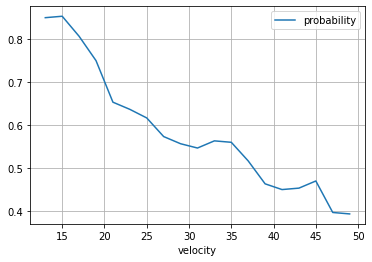

In [16]:
df_tari_625_m1_tid_off.plot(x='velocity', y='probability', grid=True)

<AxesSubplot:xlabel='velocity'>

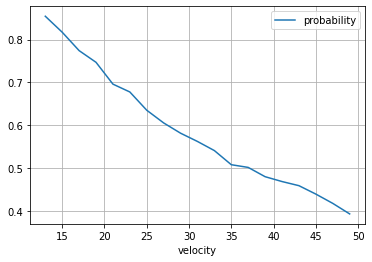

In [6]:
df_tari_625_m1_tid_off.plot(x='velocity', y='probability', grid=True)